In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.preprocessing import LabelEncoder
from copy import deepcopy

In [3]:
le = LabelEncoder()

In [4]:
df = pd.read_csv('lymph.csv')
df = df[df != '?']
df = df.fillna(method='bfill')
df = df.reset_index(drop=True)
df = df.dropna()

In [5]:
df.tail()

,'lymphatics','block_of_affere','bl_of_lymph_c','bl_of_lymph_s','by_pass','extravasates','regeneration_of','early_uptake_in','lym_nodes_dimin','lym_nodes_enlar','changes_in_lym','defect_in_node','changes_in_node','changes_in_stru','special_forms','dislocation_of','exclusion_of_no','no_of_nodes_in','class'
143,displaced,no,no,no,no,no,no,yes,1,3,round,lacunar,lacunar,coarse,chalices,yes,yes,2,metastases
144,deformed,no,no,no,no,yes,no,yes,1,4,round,lac_central,lacunar,coarse,vesicles,yes,yes,6,malign_lymph
145,deformed,yes,no,no,yes,yes,no,yes,1,2,oval,lac_central,lac_margin,diluted,chalices,yes,yes,4,malign_lymph
146,deformed,yes,no,no,no,no,no,yes,1,3,oval,lacunar,lac_central,faint,vesicles,yes,yes,3,malign_lymph
147,arched,no,no,no,no,no,no,no,1,1,oval,lac_central,lac_margin,faint,chalices,yes,yes,2,metastases


In [6]:
a_list = []

In [7]:
for i in range(len(df)):
    a_list.append(df.loc[i].tolist())

In [8]:
a_list_enc = []
temp = []

In [9]:
def LE(tlist, num):
    t = []
    for i in range(len(tlist)):
        t.append(tlist[i][num])
    le.fit(t)
    numpy = le.transform(t)
    numpy.resize(len(tlist),1)
    numpy = numpy.tolist()
    return numpy

In [10]:
a_list_enc = LE(a_list, 0)
for i in range(len(a_list[0])-1):
    temp = LE(a_list, i+1)
    for j in range(len(a_list)):
        a_list_enc[j].extend(temp[j])

In [11]:
a_list_enc[:5]

[[0, 1, 0, 0, 0, 0, 0, 1, 0, 3, 2, 0, 2, 7, 2, 1, 1, 4, 1],
 [2, 1, 0, 0, 1, 1, 0, 1, 0, 2, 2, 0, 2, 1, 2, 1, 1, 2, 1],
 [1, 0, 0, 0, 1, 1, 1, 0, 2, 0, 0, 2, 3, 1, 2, 0, 0, 6, 0],
 [0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 2, 2, 0, 1, 0, 1],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 1, 3, 2, 0, 0, 0, 2]]

################# 2번 ###############

In [12]:
from sklearn.preprocessing import MinMaxScaler

In [13]:
scaler = MinMaxScaler(feature_range=(0,1))

In [14]:
a_list_enc_norm = []
temp = []

In [15]:
X = []###X_data
Y = []###target_data
for i in range(len(a_list_enc)):
    X.append(a_list_enc[i][:-1])
    Y.append(a_list_enc[i][-1])

In [16]:
X[:5]

[[0, 1, 0, 0, 0, 0, 0, 1, 0, 3, 2, 0, 2, 7, 2, 1, 1, 4],
 [2, 1, 0, 0, 1, 1, 0, 1, 0, 2, 2, 0, 2, 1, 2, 1, 1, 2],
 [1, 0, 0, 0, 1, 1, 1, 0, 2, 0, 0, 2, 3, 1, 2, 0, 0, 6],
 [0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 2, 2, 0, 1, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 1, 3, 2, 0, 0, 0]]

In [17]:
Y[:5]

[1, 1, 0, 1, 2]

In [18]:
def MMS(tlist, num):
    t = []
    for i in range(len(tlist)):
        t.append([tlist[i][num]])
    scaler.fit(t)
    numpy = scaler.transform(t)
    numpy.resize(len(tlist),1)
    numpy = numpy.tolist()
    return numpy

In [19]:
a_list_enc_norm = MMS(a_list_enc, 0)

for i in range(len(X[0])-1):
    temp = MMS(X, i+1)## 1~17열까지 계산
    for j in range(len(X)):
        a_list_enc_norm[j].extend(temp[j])

In [20]:
scaled_X = deepcopy(a_list_enc_norm)

for i in range(len(X)):
    a_list_enc_norm[i].append(Y[i])

In [21]:
print(a_list_enc_norm[:5])

[[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.6666666666666666, 1.0, 1.0, 1.0, 1.0, 0.5714285714285714, 1], [0.6666666666666666, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.6666666666666666, 1.0, 0.0, 0.6666666666666666, 0.14285714285714285, 1.0, 1.0, 1.0, 0.2857142857142857, 1], [0.3333333333333333, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.6666666666666666, 1.0, 0.14285714285714285, 1.0, 0.0, 0.0, 0.8571428571428571, 0], [0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.3333333333333333, 0.5, 0.3333333333333333, 0.3333333333333333, 0.2857142857142857, 1.0, 0.0, 1.0, 0.0, 1], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.3333333333333333, 1.0, 0.3333333333333333, 0.3333333333333333, 0.42857142857142855, 1.0, 0.0, 0.0, 0.0, 2]]


################### 3번 #################

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X_data = scaled_X
Y_data = Y

In [24]:
#X_data

In [25]:
#Y_data

In [26]:
X_train, X_test, Y_train, Y_test = train_test_split(X_data, Y_data, test_size=0.3, random_state=42)

################## 4번 ################

In [27]:
from sklearn.preprocessing import StandardScaler 
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report,confusion_matrix

In [28]:
print(len(X_train),len(X_test),len(Y_train),len(Y_test))

103 45 103 45


In [29]:
def score(prediction, real):
    sco = []
    for i in range(len(real)):
        if(prediction[i] == real[i]):
            sco.append(1)
        else:
            sco.append(0)
        
        a = sum(sco)/len(real)
    return "%.3f" % a

################### 테스트 부분 시작 ####################

KNN

In [30]:
from sklearn.neighbors import NearestNeighbors
from sklearn.neighbors import KNeighborsClassifier

In [31]:
clf = KNeighborsClassifier(n_neighbors=7)
clf.fit(X_train, Y_train) 
predictions = clf.predict(X_test)

print(clf.score(X_test, Y_test))

pred_prob = clf.predict_proba(X_test)
print(pred_prob)

0.7333333333333333
[[0.         0.         1.         0.        ]
 [0.         0.85714286 0.14285714 0.        ]
 [0.         0.71428571 0.28571429 0.        ]
 [0.         0.         1.         0.        ]
 [0.         0.85714286 0.14285714 0.        ]
 [0.         0.85714286 0.14285714 0.        ]
 [0.         0.28571429 0.71428571 0.        ]
 [0.         0.85714286 0.14285714 0.        ]
 [0.         0.57142857 0.42857143 0.        ]
 [0.         1.         0.         0.        ]
 [0.         0.42857143 0.57142857 0.        ]
 [0.         0.28571429 0.71428571 0.        ]
 [0.         1.         0.         0.        ]
 [0.         0.57142857 0.42857143 0.        ]
 [0.         0.14285714 0.85714286 0.        ]
 [0.         0.         1.         0.        ]
 [0.         1.         0.         0.        ]
 [0.         0.71428571 0.28571429 0.        ]
 [0.         0.28571429 0.71428571 0.        ]
 [0.         0.14285714 0.85714286 0.        ]
 [0.         1.         0.         0.    

############## 3 - 1 ###############

In [32]:
n_list = []
score_list = []
def knn(n):
    clf = KNeighborsClassifier(n_neighbors=n)
    clf.fit(X_train, Y_train) 
    predictions = clf.predict(X_test)
    
    n_list.append(n)
    score_list.append(clf.score(X_test, Y_test))

In [33]:
knn(1)
knn(3)
knn(5)
knn(9)
knn(15)

In [34]:
n_list

[1, 3, 5, 9, 15]

In [35]:
score_list

[0.7111111111111111,
 0.7333333333333333,
 0.7333333333333333,
 0.7333333333333333,
 0.7777777777777778]

Text(0.5,0,'N = ')

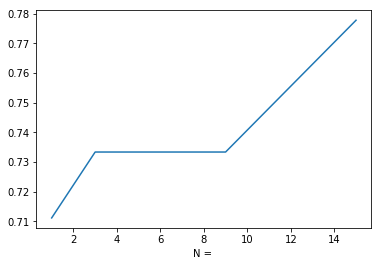

In [36]:
plt.plot(n_list, score_list)
plt.xlabel("N = ")

AdaBoost

################# 3 - 2 ################

In [37]:
n_list1 = []
score_list1 = []

n_list2 = []
score_list2 = []

In [38]:
def knn_uniform(n):
    clf = KNeighborsClassifier(n_neighbors=n, weights='uniform')
    clf.fit(X_train, Y_train) 
    predictions = clf.predict(X_test)
    
    n_list1.append(n)
    score_list1.append(clf.score(X_test, Y_test))

In [39]:
def knn_distance(n):
    clf = KNeighborsClassifier(n_neighbors=n, weights='distance')
    clf.fit(X_train, Y_train) 
    predictions = clf.predict(X_test)
    
    n_list2.append(n)
    score_list2.append(clf.score(X_test, Y_test))

In [40]:
knn_uniform(1)
knn_distance(1)
knn_uniform(3)
knn_distance(3)
knn_uniform(5)
knn_distance(5)
knn_uniform(9)
knn_distance(9)
knn_uniform(15)
knn_distance(15)

In [41]:
n_list1

[1, 3, 5, 9, 15]

Text(0.5,0,'N = ')

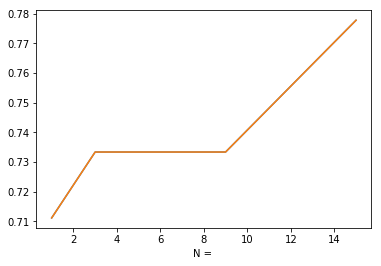

In [42]:
plt.plot(n_list1, score_list1)
plt.plot(n_list2, score_list2)
plt.xlabel("N = ")

weights를 바꾸어도 결과가 같습니다.(동일한 결과라 한 그래프로 보입니다.)
균일한 가중치와 거리에 따른 가중치가 결과에 영향을 미치지 못 했습니다.

################# 3 - 3 ################

In [43]:
n_list1 = []
knn_score_list1 = []

n_list2 = []
knn_score_list2 = []

def knn_p1(n):
    clf = KNeighborsClassifier(n_neighbors=n, p=1)
    clf.fit(X_train, Y_train) 
    predictions = clf.predict(X_test)
    
    n_list1.append(n)
    knn_score_list1.append(clf.score(X_test, Y_test))
    
def knn_p2(n):
    clf = KNeighborsClassifier(n_neighbors=n, p=2)
    clf.fit(X_train, Y_train) 
    predictions = clf.predict(X_test)
    
    n_list2.append(n)
    knn_score_list2.append(clf.score(X_test, Y_test))

In [44]:
knn_p1(1)
knn_p2(1)

knn_p1(3)
knn_p2(3)

knn_p1(5)
knn_p2(5)

knn_p1(9)
knn_p2(9)

knn_p1(15)
knn_p2(15)

In [45]:
knn_score_list1#### p=1

[0.7333333333333333, 0.8, 0.8, 0.8, 0.8]

In [46]:
knn_score_list2#### p=2

[0.7111111111111111,
 0.7333333333333333,
 0.7333333333333333,
 0.7333333333333333,
 0.7777777777777778]

Text(0.5,0,'N = ')

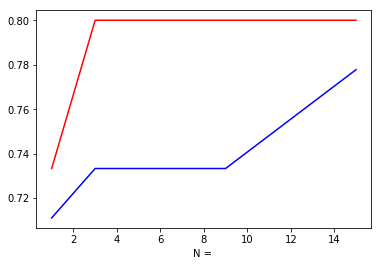

In [47]:
plt.plot(n_list1, knn_score_list1, c='r')
plt.plot(n_list2, knn_score_list2, c='b')
plt.xlabel("N = ")

p=1인 경우에 전체적인 결과가 더 좋게 나타납니다.

Manhattan Distance를 사용했을 때 단순한 직선거리보다 결과가 좋게 나왔습니다.

################# 3 - 4 ################

In [48]:
clf = NearestNeighbors(n_neighbors=1)
clf.fit(X_train) 
clf.kneighbors([X_test[1]])

(array([[1.33715439]]), array([[80]], dtype=int64))

Adaboost

In [49]:
from sklearn.ensemble import AdaBoostClassifier

In [50]:
clf = AdaBoostClassifier()
clf.fit(X_train, Y_train) 
predictions = clf.predict(X_test)

clf.score(X_test, Y_test)

0.6

In [51]:
pred_prob = clf.predict_proba(X_test)
print(pred_prob[:10])

[[8.55449072e-12 4.92080062e-01 5.07919938e-01 1.92778055e-11]
 [9.99963590e-01 1.83260020e-05 1.80844968e-05 3.84501047e-13]
 [8.69427630e-12 5.03316422e-01 4.96683578e-01 9.95286627e-12]
 [8.55449072e-12 4.92080062e-01 5.07919938e-01 1.92778055e-11]
 [8.55449072e-12 4.92080062e-01 5.07919938e-01 1.92778055e-11]
 [8.69427630e-12 5.03316422e-01 4.96683578e-01 9.95286627e-12]
 [8.55449072e-12 4.92080062e-01 5.07919938e-01 1.92778055e-11]
 [8.69427630e-12 5.03316422e-01 4.96683578e-01 9.95286627e-12]
 [8.55449072e-12 4.92080062e-01 5.07919938e-01 1.92778055e-11]
 [8.69427630e-12 5.03316422e-01 4.96683578e-01 9.95286627e-12]]


################# 4 - 1 ################

In [52]:
n_list = []
ada_score_list = []
def adaboost(n):
    clf = AdaBoostClassifier(n_estimators=n)
    clf.fit(X_train, Y_train) 
    n_list.append(n)
    ada_score_list.append(clf.score(X_test, Y_test))

In [53]:
adaboost(3)
adaboost(7)
adaboost(10)
adaboost(50)
adaboost(100)

Text(0,0.5,'accuracy')

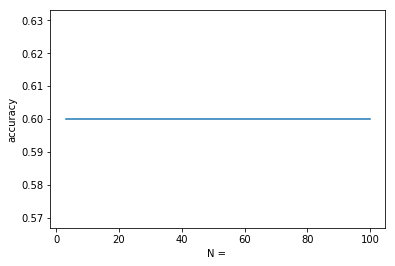

In [54]:
plt.plot(n_list, ada_score_list)
plt.xlabel("N = ")
plt.ylabel("accuracy")

n_estimators 값은 약 분류기의 갯수를 뜻합니다. 하지만 위의 자료에서는 결과에 변화가 없는 것으로 나타났습니다.

################# 4 - 2 ################

In [55]:
knn_score_list1 # knn p=1 classifier

[0.7333333333333333, 0.8, 0.8, 0.8, 0.8]

Text(0.5,0,'Number of attempts')

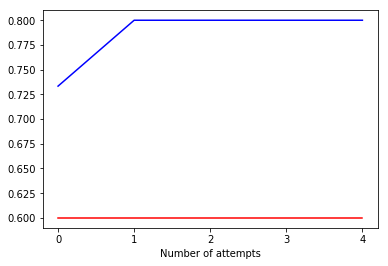

In [56]:
plt.plot(ada_score_list, c='r')#빨간색
plt.plot(knn_score_list1, c='b')#파란색
n = [0,1,2,3,4]
plt.xticks(n)
plt.xlabel("Number of attempts")

knn 분류기가 위 데이터셋에서 더 뛰어난 것으로 확인됩니다.

Random Forest

In [57]:
from sklearn.ensemble import RandomForestClassifier

In [93]:
clf = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=0)
clf.fit(X_train, Y_train)
predictions = clf.predict(X_test)

clf.score(X_test, Y_test)


0.8444444444444444

In [94]:
print(clf)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=2, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)


################## 5 - 1 ################## 

In [73]:
n_list = []
RF_score_list = []
def RF(n):
    clf = RandomForestClassifier(n_estimators=n, max_depth=2, random_state=0)
    clf.fit(X_train, Y_train)
    n_list.append(n)
    RF_score_list.append(clf.score(X_test, Y_test))

In [70]:
RF(5)
RF(10)
RF(50)
RF(100)
RF(300)

In [71]:
RF_score_list

[0.7777777777777778,
 0.7777777777777778,
 0.8444444444444444,
 0.8444444444444444,
 0.8222222222222222]

C:\Users\tjdwo\Anaconda3\envs\tf1.8\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


[(0.6, 1)]

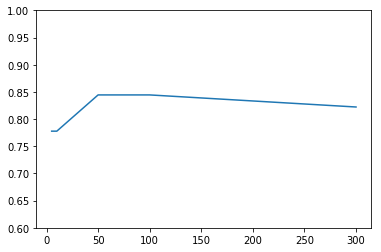

In [72]:
plt.plot(n_list, RF_score_list)
plt.subplot().set(ylim=[0.6,1])

n_estimators 는 약 분류기의 갯수를 말합니다. 여기서는 random forest 내부의 약한 decision tree의 갯수를 말합니다.
너무 낮으면 정확도가 떨어지는 경향이 있습니다.

################## 5 - 2 ################## 

In [63]:
clf = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=0, oob_score=True)
clf.fit(X_train, Y_train)
predictions = clf.predict(X_test)

clf.score(X_test, Y_test)

0.8444444444444444

In [64]:
clf = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=0, oob_score=False)
clf.fit(X_train, Y_train)
predictions = clf.predict(X_test)

clf.score(X_test, Y_test)

0.8444444444444444

oob_score는 트리들을 훈련시킨 후에 bootstraping 한 데이터들과 비교해 특정 값을 포함하지 않는 값들을 따로 모아둔 후에 랜덤포레스트로 학습을 시킨 점수입니다.

################## 5 - 3 ################## 

In [65]:
clf = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=0, oob_score=True)
clf.fit(X_train, Y_train)
predictions = clf.predict(X_test)

clf.score(X_test, Y_test)

0.8444444444444444

In [66]:
for op in ["auto", "sqrt", "log2", 15]:
    clf = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=0, oob_score=True, max_features=op)
    clf.fit(X_train, Y_train)
    predictions = clf.predict(X_test)

    print(op, clf.score(X_test, Y_test))

auto 0.8444444444444444
sqrt 0.8444444444444444
log2 0.8444444444444444
15 0.8666666666666667


max_feature 는 각 트리별로 몇개의 attributes를 선택할 지를 결정합니다. auto, sqrt, log2 등은 속성을 몇 개 선택 할 지를 결정하는 수식입니다.
max_feature는 숫자로도 입력할 수 있으며 숫자가 커지면 과적합을 예방할 가능성이 있습니다. 최대값은 속성의 갯수입니다.

5 - 4

Text(0.5,0,'Number of attempts')

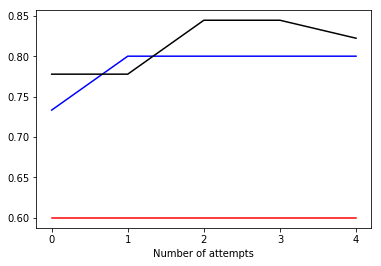

In [67]:
plt.plot(ada_score_list, c='red')
plt.plot(knn_score_list1, c='blue')
plt.plot(RF_score_list, c='black')
n = [0,1,2,3,4]
plt.xticks(n)
plt.xlabel("Number of attempts")

최고 성능과 전체적인 성능 모두 Random Forest가 가장 좋습니다.

SVM

In [68]:
from sklearn import svm

In [69]:
clf = svm.SVC()
clf.fit(X_train, Y_train)
predictions = clf.predict(X_test)

clf.score(X_test, Y_test)

C:\Users\tjdwo\Anaconda3\envs\tf1.8\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.8

5 - 1

In [70]:
svc_score_list = []
for op in ['linear', 'poly', 'rbf', 'sigmoid']:
    clf = svm.SVC(kernel=op)
    clf.fit(X_train, Y_train)
    svc_score_list.append(clf.score(X_test, Y_test))
    print(op, clf.score(X_test, Y_test))

linear 0.7333333333333333
poly 0.5555555555555556
rbf 0.8
sigmoid 0.7777777777777778


C:\Users\tjdwo\Anaconda3\envs\tf1.8\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\tjdwo\Anaconda3\envs\tf1.8\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\tjdwo\Anaconda3\envs\tf1.8\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


rbf Kernel이 가장 좋은 결과를 나타냅니다.

Text(0.5,0,'Number of attempts')

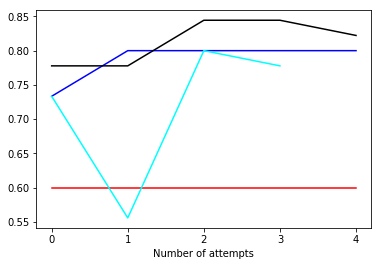

In [71]:
plt.plot(ada_score_list, c='red')
plt.plot(knn_score_list1, c='blue')
plt.plot(RF_score_list, c='black')
plt.plot(svc_score_list, c='cyan')# V자 모양 그래프
n = [0,1,2,3,4]
plt.xticks(n)
plt.xlabel("Number of attempts")

해당 데이터 셋에서는 Random Forest > knn > svm > adaboost 순으로 성능이 좋습니다.